In [1]:
#| hide
#| eval: false
import sys
sys.path.append("/notebooks/katlas")
from nbdev.showdoc import *
%matplotlib inline

In [2]:
from katlas.core import Data
from katlas.feature import *
from katlas.plot import *
from fastbook import *
from tqdm.notebook import tqdm; tqdm.pandas()

/usr/local/lib/python3.9/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument 

# Get amino acid features

> Extract features from amino acid

We can use two methods to extract features from amino acid:
- Rdkit descriptors
- Morgan Fingerprints

## Rdkit descriptors

In [3]:
# Download the amino acid info
aa_info = Data.get_aa_info()
aa_info2 = aa_info[['aa','SMILES']]

Extract all of the 209 rdkit features

In [4]:
show_doc(smi2prop)

---

### smi2prop

>      smi2prop (df, smi_colname='SMILES', id_colname='ID',
>                remove_duplicate=False, thr=0.95, normalize=True)

Extract ~209 features from smiles via rdkit.Chem.Descriptors, and remove duplicate features

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df |  |  | df needs to have SMILES an ID columns |
| smi_colname | str | SMILES | column name of smiles |
| id_colname | str | ID | column name of ID |
| remove_duplicate | bool | False | remove features that are highly correlated |
| thr | float | 0.95 | threshold of Pearson correlation |
| normalize | bool | True | normalize features using StandardScaler() |

In [5]:
aa_full_feature = smi2prop(aa_info2, id_colname='aa',remove_duplicate=False)

In [6]:
aa_full_feature.shape

(23, 210)

In [8]:
aa_full_feature.head(2)

,aa,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,A,9.574074,-1.573701,1.193554,0.430590,-0.375462,-1.439770,-1.410267,-1.439436,-1.491575,0.0,-0.392233,0.228166,-0.308911,-0.398345,1.656688,0.103007,-0.780051,-0.526903,1.203883,-1.415519,1.465101,-1.347549,1.162418,-0.554270,0.678178,-1.660842,0.058766,-0.928528,-1.420966,-1.372879,-1.406169,-1.434358,-1.395786,-1.364454,-1.28965,-1.287461,-1.371840,-1.490293,-1.312462,-1.397762,0.661861,-0.443256,-1.488584,-1.704924,-1.164169,-1.472171,-1.088274,-0.113045,-0.213201,-0.308607,0.0,-0.521596,-0.682582,-0.458413,-0.308393,0.0,-0.647398,-0.224260,-0.480351,-0.694405,-0.68823,-0.882977,-0.213201,-0.432331,-0.495561,-0.290532,-0.695145,-0.511968,0.0,-0.308607,-0.482124,0.0,-0.308607,-0.510698,-1.373429,-0.884527,-0.45843,-0.241607,-0.504435,0.0,-0.213201,0.0,-0.945646,-0.535127,-0.66116,0.0,-0.922850,-0.621218,-0.611041,0.790873,-0.440926,-0.455591,-0.769976,-0.626017,-0.387091,-0.285797,-0.779939,-0.748232,-0.483822,0.342808,-0.393932,-0.4624,0.572190,0.387283,0.349099,-1.412520,-0.883541,-0.955395,0.0,-0.213201,-0.213201,-0.458831,-0.308607,-0.493197,-1.192079,-1.091089,-0.960437,-1.707117,0.0,-0.213201,-0.213201,-0.55689,-0.082356,-1.373751,-0.308607,-0.308607,-0.308607,0.0,0.0,-0.291386,-0.308607,-0.213201,-0.308607,-0.308607,-0.458831,-0.308607,0.0,0.0,0.0,-0.213201,-0.428746,-0.291386,0.0,0.0,0.0,-0.308607,-0.213201,0.0,0.0,0.0,0.0,-0.308607,0.0,0.0,0.0,0.0,0.0,0.0,-0.458831,0.0,-0.213201,0.0,0.0,0.0,0.0,0.0,0.0,-0.213201,0.0,0.0,0.0,-0.213201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

If you'd like to remove highly correlated features and features with no variance, set remove_duplicate to True, and set and threshold of Pearson correlation (recommand value 0.9-0.98)

In [9]:
aa_reduced_feature = smi2prop(aa_info, id_colname='aa',remove_duplicate=True, thr=0.9)

number of 209 features are detected
dropping 67 features, as they have zero std variance:['NumRadicalElectrons', 'PEOE_VSA13', 'PEOE_VSA5', 'SMR_VSA8', 'SlogP_VSA10', 'SlogP_VSA7', 'SlogP_VSA9', 'EState_VSA11', 'NumAliphaticCarbocycles', 'NumSaturatedCarbocycles', 'fr_ArN', 'fr_Ar_COO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_N_O', 'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_aldehyde', 'fr_alkyl_carbamate', 'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amidine', 'fr_aniline', 'fr_aryl_methyl', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_epoxide', 'fr_ester', 'fr_ether', 'fr_furan', 'fr_halogen', 'fr_hdrzine', 'fr_hdrzone', 'fr_imide', 'fr_isocyan', 'fr_isothiocyan', 'fr_ketone', 'fr_ketone_Topliss', 'fr_lactam', 'fr_lactone', 'fr_methoxy', 'fr_morpholine', 'fr_nitrile', 'fr_nitro', 'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_oxazole', 'fr_oxime', 'fr_piperdine', 'fr_piperzine', 'fr_prisulfonamd', 'fr_pyridine', 'fr_quatN'

In [10]:
aa_reduced_feature.head(2)

,aa,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,MinPartialCharge,MaxAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,HallKierAlpha,Kappa2,Kappa3,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA10,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SlogP_VSA1,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA8,EState_VSA1,EState_VSA10,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState7,VSA_EState8,FractionCSP3,NumAliphaticHeterocycles,NumAromaticHeterocycles,NumHAcceptors,MolLogP,fr_Al_COO,fr_Al_OH,fr_C_O,fr_NH0,fr_NH1,fr_sulfide,fr_unbrch_alkane
0,A,9.574074,1.193554,0.430590,-0.375462,-1.439770,0.228166,-0.308911,1.656688,0.103007,-0.780051,-0.526903,1.203883,-1.415519,1.465101,-1.347549,1.162418,0.678178,-1.660842,0.058766,-0.928528,0.661861,-1.704924,-1.164169,-1.088274,-0.113045,-0.213201,-0.308607,-0.521596,-0.682582,-0.458413,-0.308393,-0.647398,-0.224260,-0.480351,-0.694405,-0.882977,-0.432331,-0.495561,-0.290532,-0.695145,-0.511968,-0.482124,-1.373429,-0.884527,-0.45843,-0.213201,-0.535127,-0.66116,-0.922850,-0.621218,-0.611041,-0.440926,-0.455591,-0.769976,-0.626017,-0.748232,-0.483822,0.342808,-0.4624,0.572190,0.349099,-0.213201,-0.308607,-1.192079,-0.082356,-0.308607,-0.308607,-0.458831,-0.213201,-0.428746,-0.213201,-0.308607
1,C,9.756435,-0.594121,0.396312,-0.623715,-0.643882,0.233514,-0.311825,1.656688,1.401076,0.150357,1.981889,1.146308,-0.628535,0.696026,-0.795604,0.077060,0.765682,-0.684106,0.233728,-0.790419,1.460660,-0.601392,-0.581437,-1.088274,-0.113045,-0.213201,-0.308607,-0.521596,-0.682582,-0.458413,3.364183,-0.647398,-1.107502,0.556864,-0.694405,2.015850,-0.432331,-0.495561,-1.340339,0.914158,-0.511968,-0.482124,-0.257709,-0.884527,-0.45843,-0.213201,-0.535127,-0.66116,0.310554,-0.621218,-0.611041,-0.440926,-0.455591,2.765813,-0.626017,-0.709478,-0.437633,0.631861,-0.4624,-0.522169,0.349099,-0.213201,-0.308607,0.331133,-0.196341,-0.308607,-0.308607,-0.458831,-0.213201,-0.428746,-0.213201,-0.308607


In [11]:
aa_reduced_feature.shape

(23, 73)

### Visualize

Let's now visualize this feature!

There are several dimension reduction methods that we can use to visualize in a 2D graph: PCA, TSNE, and UMAP


In [12]:
show_doc(plot_cluster)

---

### plot_cluster

>      plot_cluster (df, method='pca', hue=None, complexity=30, palette='tab20',
>                    legend=False, name_list=None, seed=123)

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df |  |  |  |
| method | str | pca |  |
| hue | NoneType | None |  |
| complexity | int | 30 |  |
| palette | str | tab20 |  |
| legend | bool | False |  |
| name_list | NoneType | None | a list or df Series of names that label the dots |
| seed | int | 123 |  |

**PCA -- amino acid full feature**

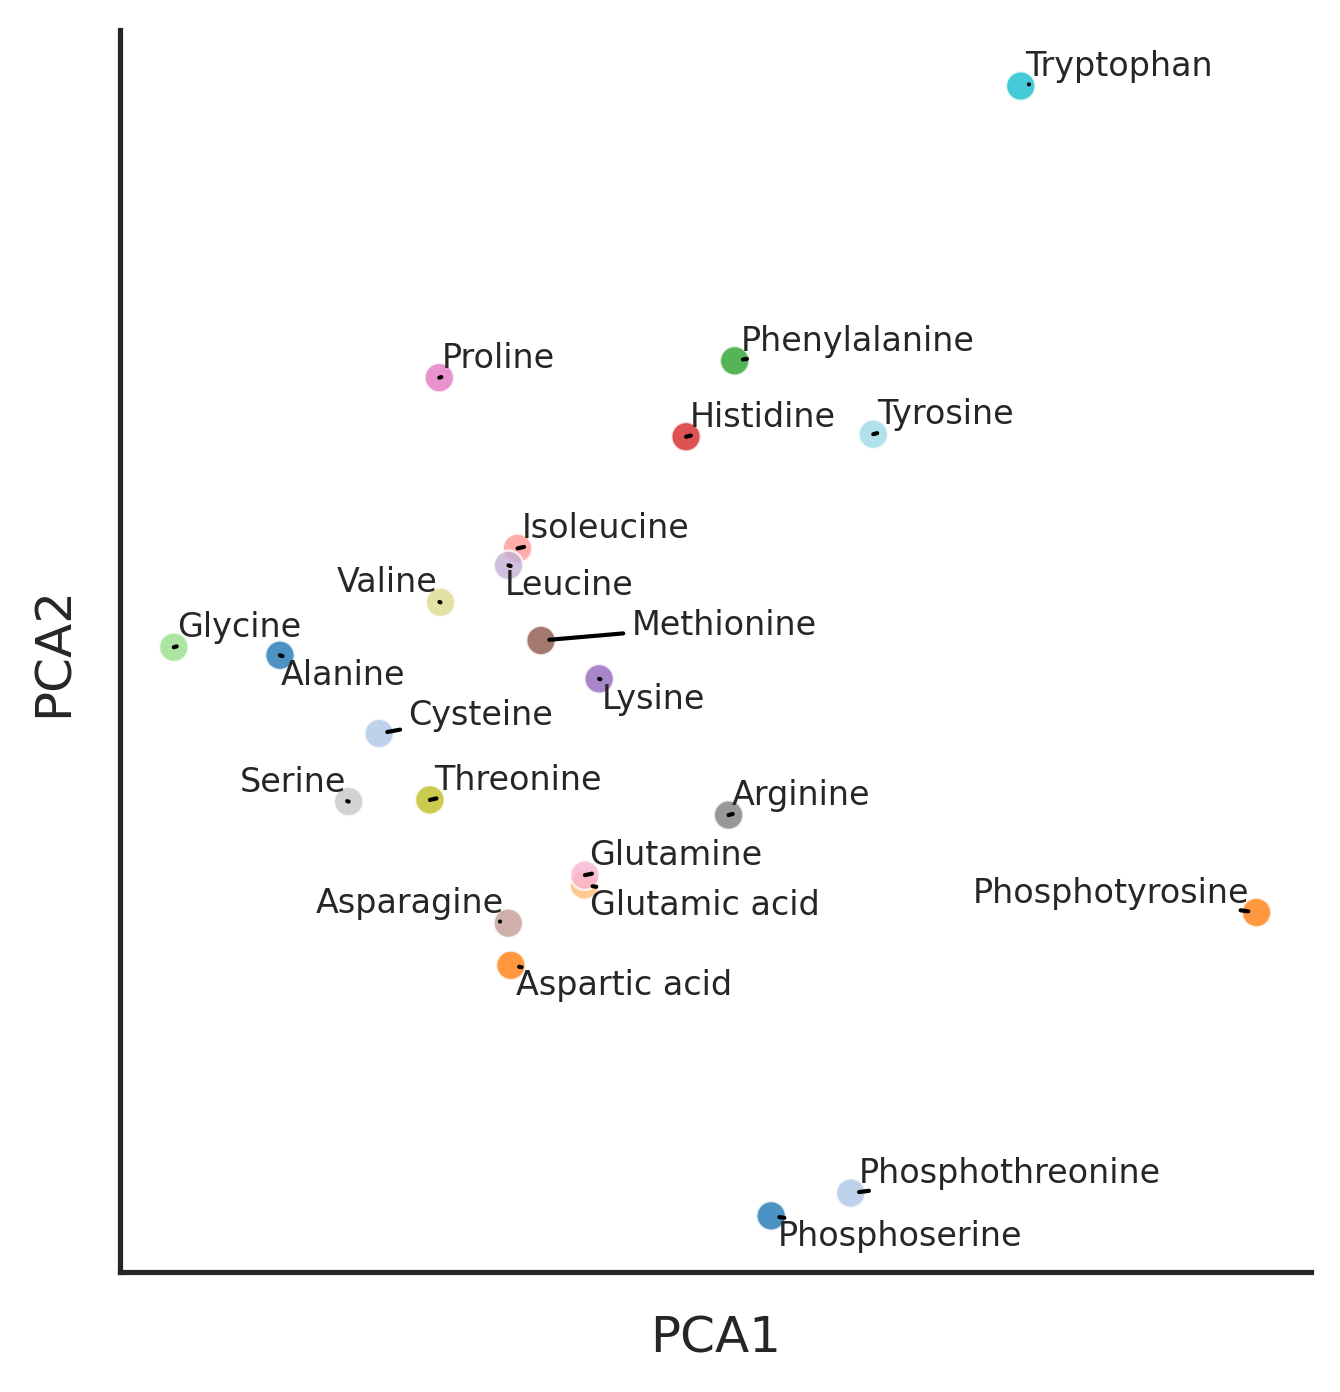

In [13]:
# visualize aa full feature
plot_cluster(aa_full_feature, name_list = aa_info.Name, hue = 'aa', method = 'pca')

**UMAP -- amino acid full feature**

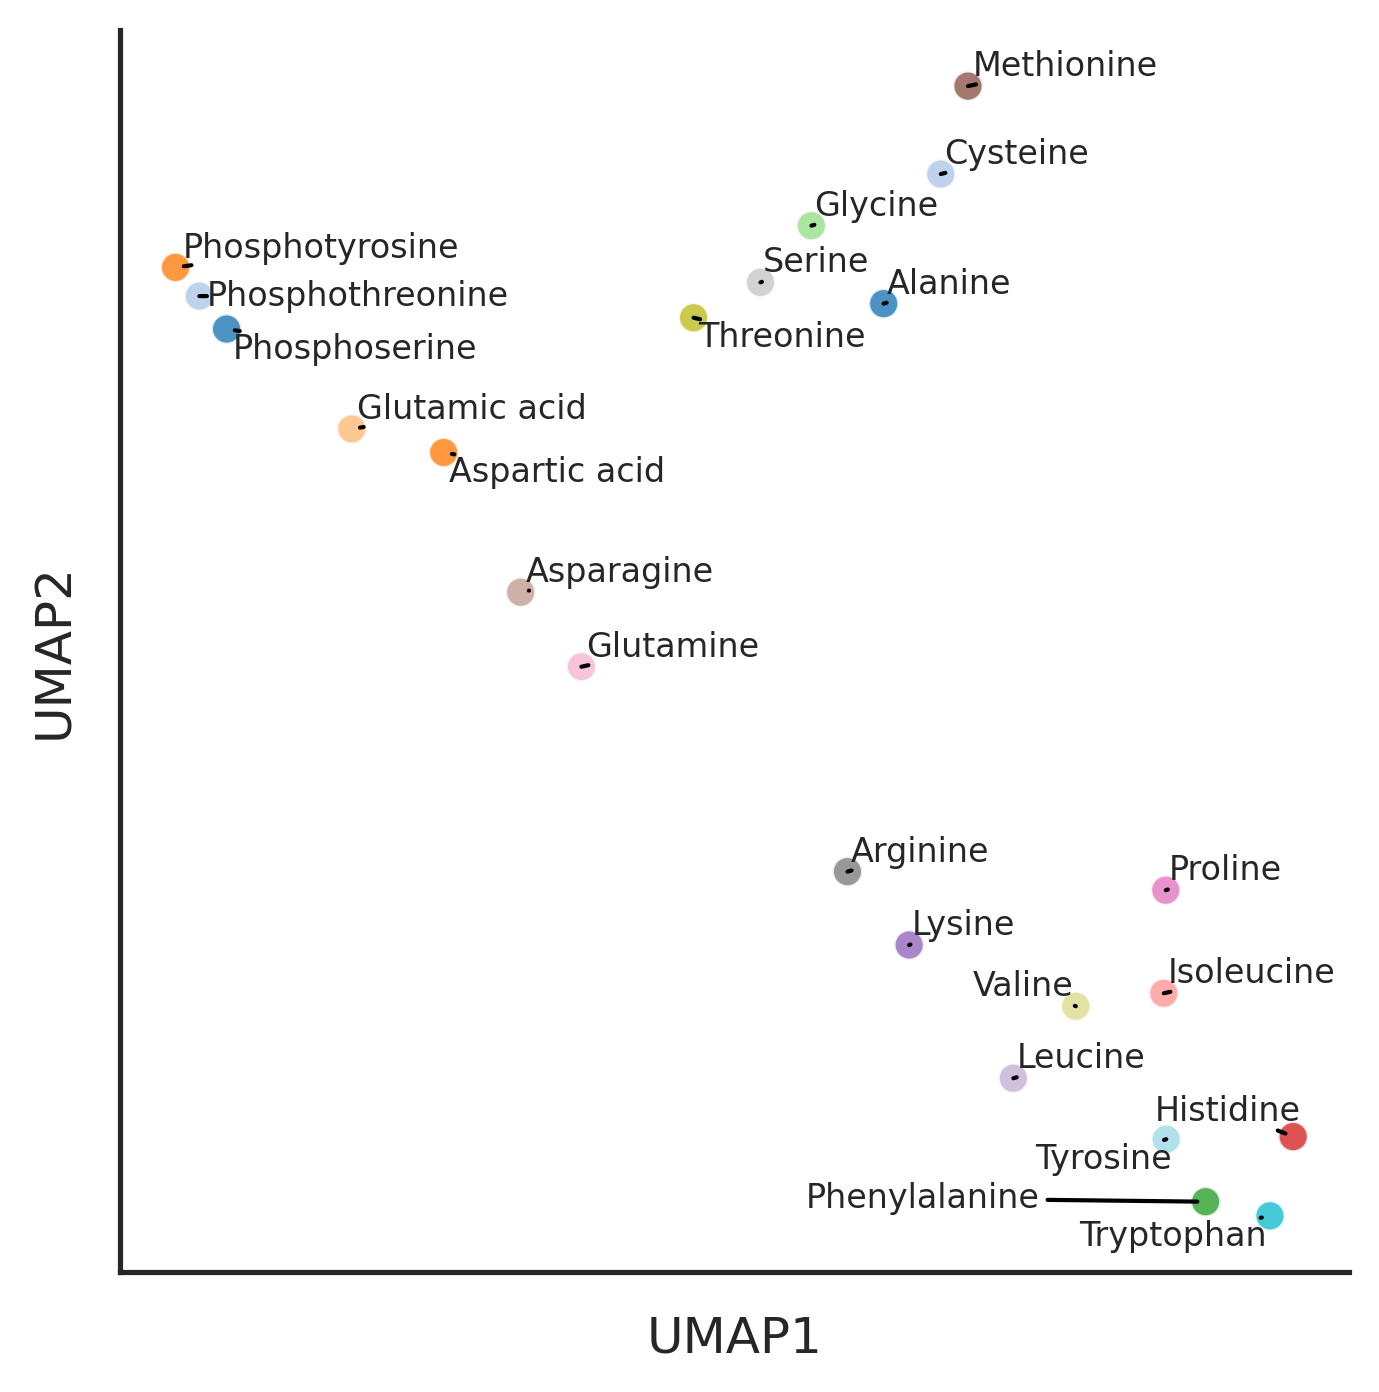

In [16]:
# visualize aa full feature
plot_cluster(aa_full_feature, name_list = aa_info.Name, hue = 'aa', method = 'umap',complexity=3)

**PCA -- amino acid feature after removing highly correlated features**

After removing highly correlated features, each amino acid is more dispersed

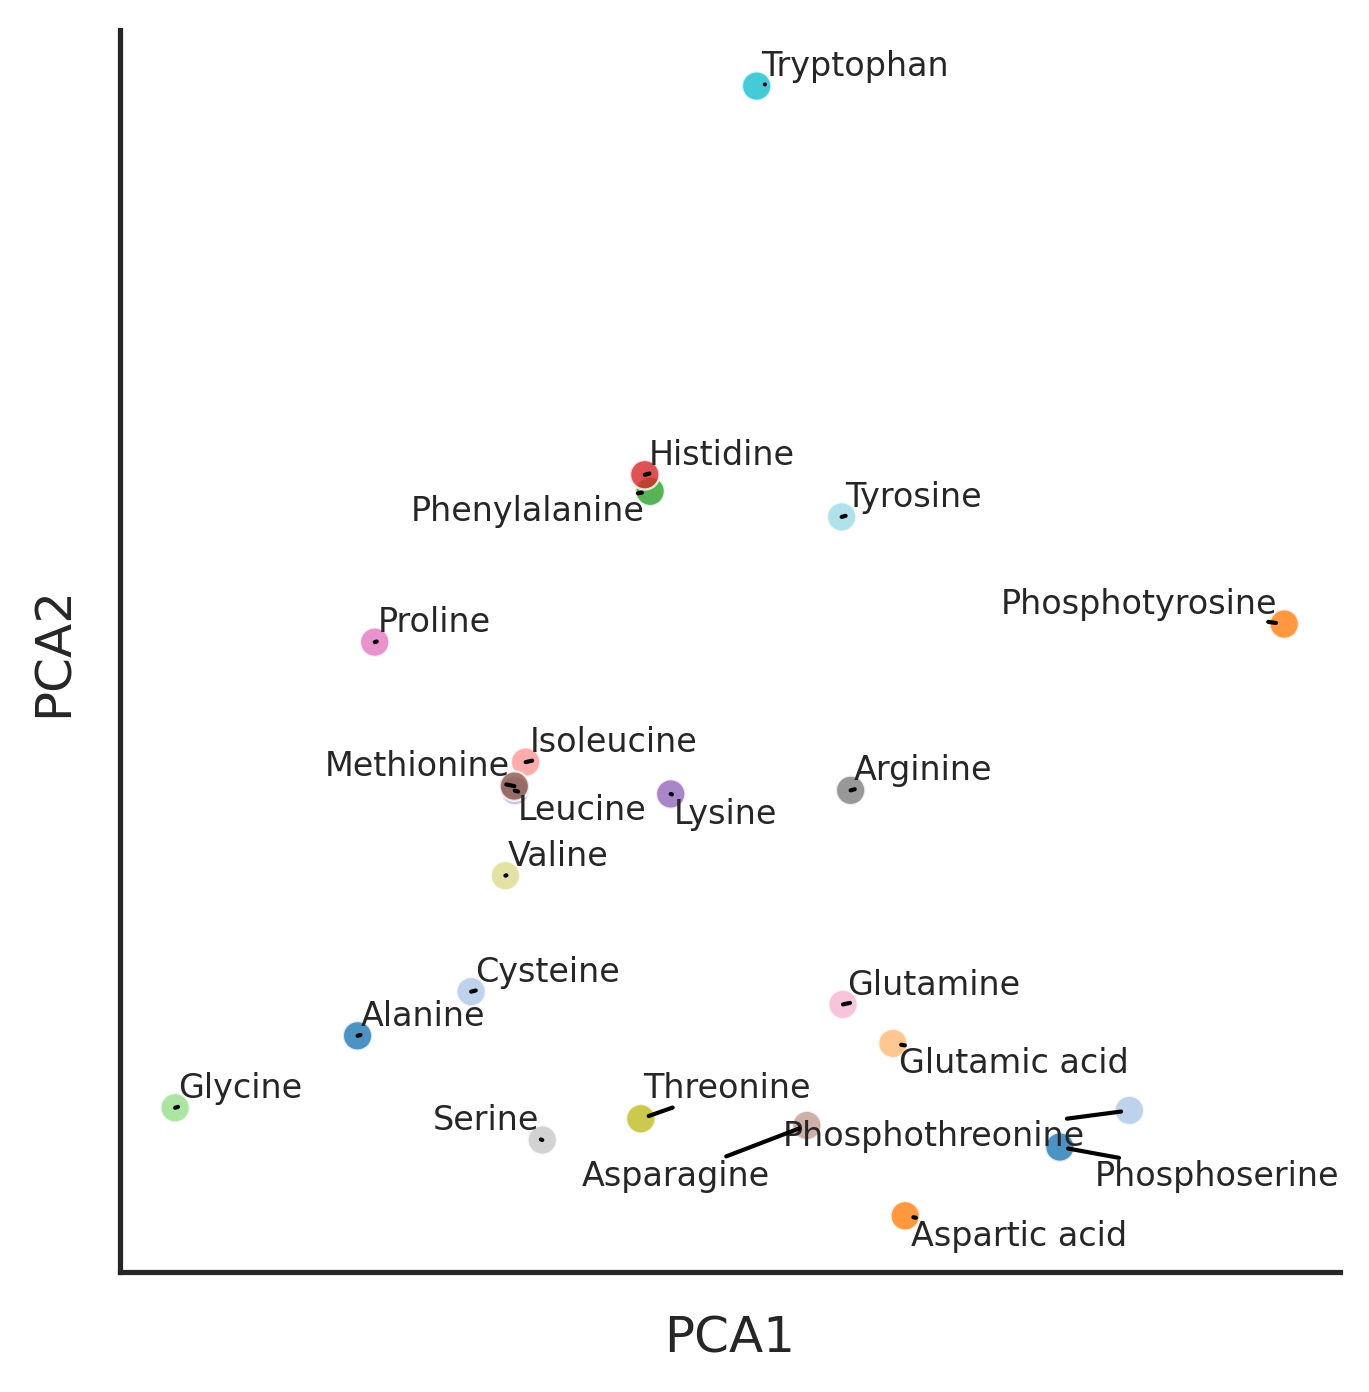

In [ ]:
plot_cluster(aa_reduced_feature, name_list = aa_info.Name, hue = 'aa', method = 'pca')

**UMAP -- amino acid feature after removing highly correlated features**

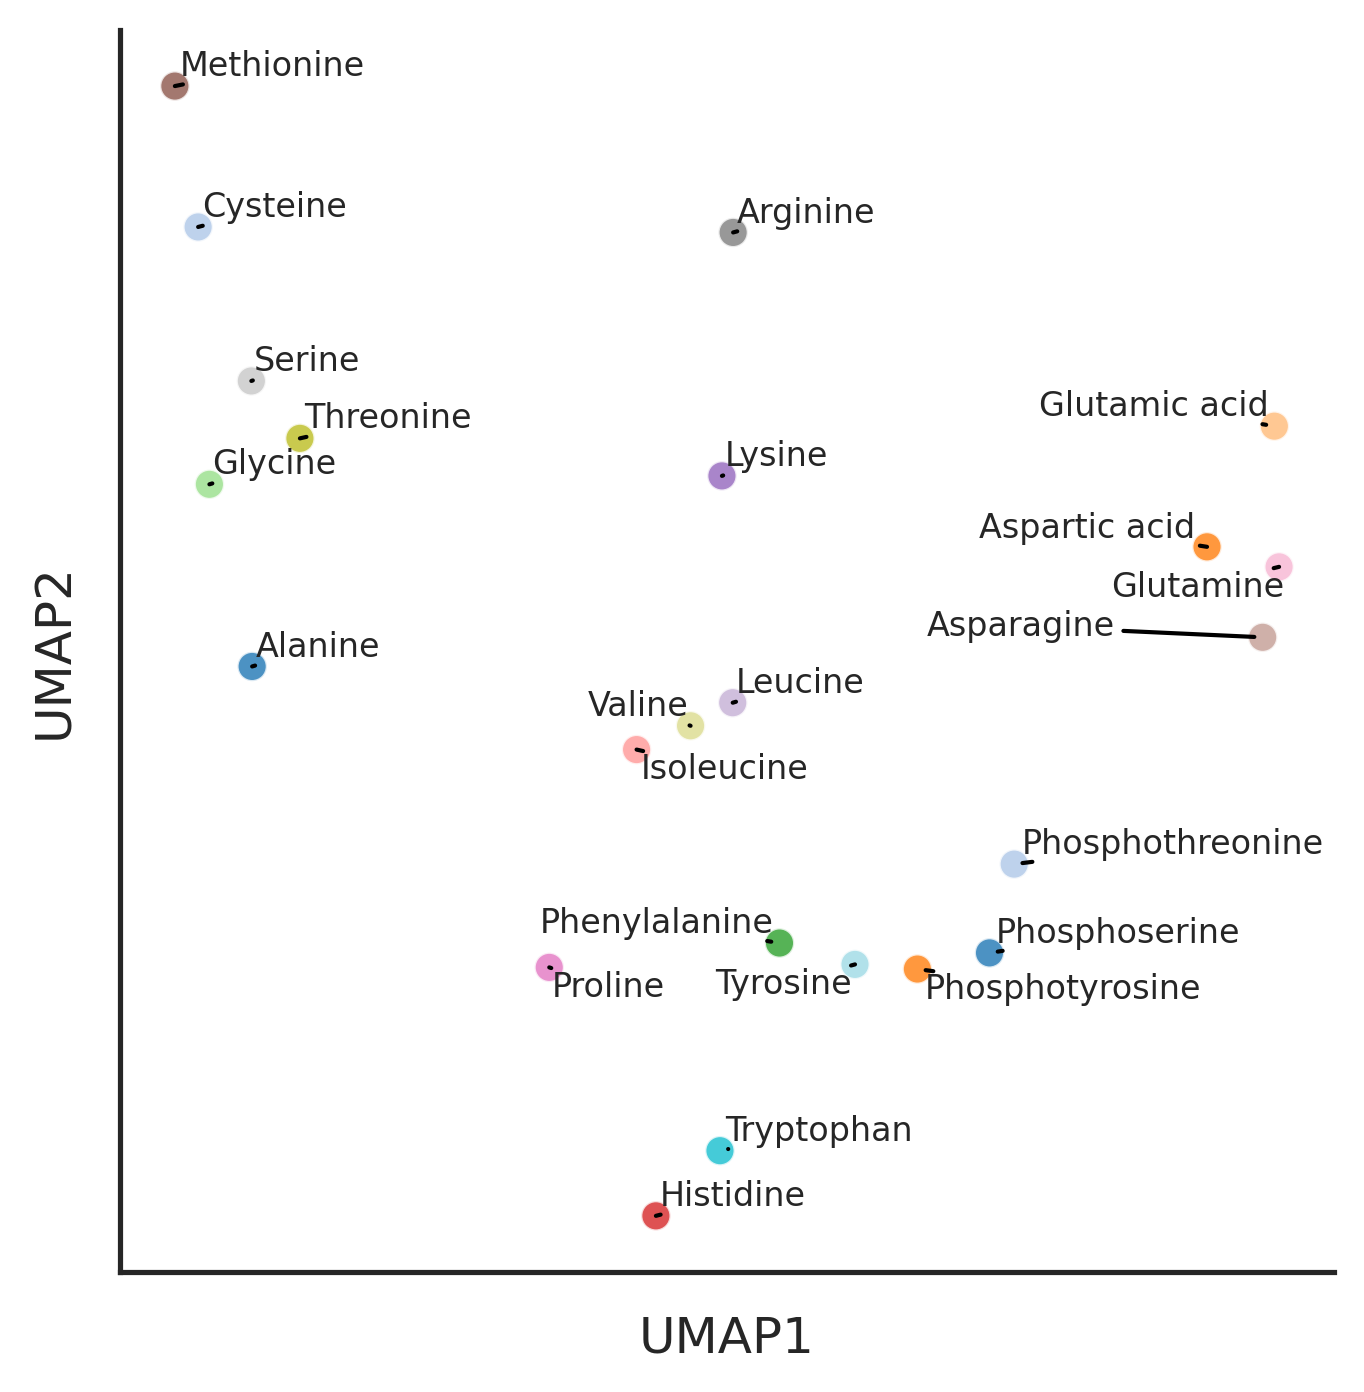

In [19]:
plot_cluster(aa_reduced_feature, name_list = aa_info.Name, hue = 'aa', method = 'umap',complexity=3)

## Morgan Fingerprints

In [20]:
show_doc(smi2morgan)

---

### smi2morgan

>      smi2morgan (df, smi_colname='SMILES', id_colname='ID')

Like `smi2prop`, get 2048 morgan feature (0/1) given a dataframe that contains ID&smiles

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df |  |  | a dataframe contains ID and SMILES columns |
| smi_colname | str | SMILES | set smiles columne name |
| id_colname | str | ID | set ID column name |

In [21]:
aa_morgan = smi2morgan(aa_info, id_colname = 'aa')

In [22]:
aa_morgan.head()

,aa,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,morgan_10,morgan_11,morgan_12,morgan_13,morgan_14,morgan_15,morgan_16,morgan_17,morgan_18,morgan_19,morgan_20,morgan_21,morgan_22,morgan_23,morgan_24,morgan_25,morgan_26,morgan_27,morgan_28,morgan_29,morgan_30,morgan_31,morgan_32,morgan_33,morgan_34,morgan_35,morgan_36,morgan_37,morgan_38,morgan_39,morgan_40,morgan_41,morgan_42,morgan_43,morgan_44,morgan_45,morgan_46,morgan_47,morgan_48,morgan_49,morgan_50,morgan_51,morgan_52,morgan_53,morgan_54,morgan_55,morgan_56,morgan_57,morgan_58,morgan_59,morgan_60,morgan_61,morgan_62,morgan_63,morgan_64,morgan_65,morgan_66,morgan_67,morgan_68,morgan_69,morgan_70,morgan_71,morgan_72,morgan_73,morgan_74,morgan_75,morgan_76,morgan_77,morgan_78,morgan_79,morgan_80,morgan_81,morgan_82,morgan_83,morgan_84,morgan_85,morgan_86,morgan_87,morgan_88,morgan_89,morgan_90,morgan_91,morgan_92,morgan_93,morgan_94,morgan_95,morgan_96,morgan_97,morgan_98,morgan_99,morgan_100,morgan_101,morgan_102,morgan_103,morgan_104,morgan_105,morgan_106,morgan_107,morgan_108,morgan_109,morgan_110,morgan_111,morgan_112,morgan_113,morgan_114,morgan_115,morgan_116,morgan_117,morgan_118,morgan_119,morgan_120,morgan_121,morgan_122,morgan_123,morgan_124,morgan_125,morgan_126,morgan_127,morgan_128,morgan_129,morgan_130,morgan_131,morgan_132,morgan_133,morgan_134,morgan_135,morgan_136,morgan_137,morgan_138,morgan_139,morgan_140,morgan_141,morgan_142,morgan_143,morgan_144,morgan_145,morgan_146,morgan_147,morgan_148,morgan_149,morgan_150,morgan_151,morgan_152,morgan_153,morgan_154,morgan_155,morgan_156,morgan_157,morgan_158,morgan_159,morgan_160,morgan_161,morgan_162,morgan_163,morgan_164,morgan_165,morgan_166,morgan_167,morgan_168,morgan_169,morgan_170,morgan_171,morgan_172,morgan_173,morgan_174,morgan_175,morgan_176,morgan_177,morgan_178,morgan_179,morgan_180,morgan_181,morgan_182,morgan_183,morgan_184,morgan_185,morgan_186,morgan_187,morgan_188,morgan_189,morgan_190,morgan_191,morgan_192,morgan_193,morgan_194,morgan_195,morgan_196,morgan_197,morgan_198,morgan_199,morgan_200,morgan_201,morgan_202,morgan_203,morgan_204,morgan_205,morgan_206,morgan_207,morgan_208,morgan_209,morgan_210,morgan_211,morgan_212,morgan_213,morgan_214,morgan_215,morgan_216,morgan_217,morgan_218,morgan_219,morgan_220,morgan_221,morgan_222,morgan_223,morgan_224,morgan_225,morgan_226,morgan_227,morgan_228,morgan_229,morgan_230,morgan_231,morgan_232,morgan_233,morgan_234,morgan_235,morgan_236,morgan_237,morgan_238,morgan_239,morgan_240,morgan_241,morgan_242,morgan_243,morgan_244,morgan_245,morgan_246,morgan_247,morgan_248,morgan_249,morgan_250,morgan_251,morgan_252,morgan_253,morgan_254,morgan_255,morgan_256,morgan_257,morgan_258,morgan_259,morgan_260,morgan_261,morgan_262,morgan_263,morgan_264,morgan_265,morgan_266,morgan_267,morgan_268,morgan_269,morgan_270,morgan_271,morgan_272,morgan_273,morgan_274,morgan_275,morgan_276,morgan_277,morgan_278,morgan_279,morgan_280,morgan_281,morgan_282,morgan_283,morgan_284,morgan_285,morgan_286,morgan_287,morgan_288,morgan_289,morgan_290,morgan_291,morgan_292,morgan_293,morgan_294,morgan_295,morgan_296,morgan_297,morgan_298,morgan_299,morgan_300,morgan_301,morgan_302,morgan_303,morgan_304,morgan_305,morgan_306,morgan_307,morgan_308,morgan_309,morgan_310,morgan_311,morgan_312,morgan_313,morgan_314,morgan_315,morgan_316,morgan_317,morgan_318,morgan_319,morgan_320,morgan_321,morgan_322,morgan_323,morgan_324,morgan_325,morgan_326,morgan_327,morgan_328,morgan_329,morgan_330,morgan_331,morgan_332,morgan_333,morgan_334,morgan_335,morgan_336,morgan_337,morgan_338,morgan_339,morgan_340,morgan_341,morgan_342,morgan_343,morgan_344,morgan_345,morgan_346,morgan_347,morgan_348,morgan_349,morgan_350,morgan_351,morgan_352,morgan_353,morgan_354,morgan_355,morgan_356,morgan_357,morgan_358,morgan_359,morgan_360,morgan_361,morgan_362,morgan_363,morgan_364,morgan_365,morgan_366,morgan_367,morgan_368,morgan_369,morgan_370,morgan_371,morgan_372,mor

In [23]:
aa_morgan.shape

(23, 2049)

### Visualize

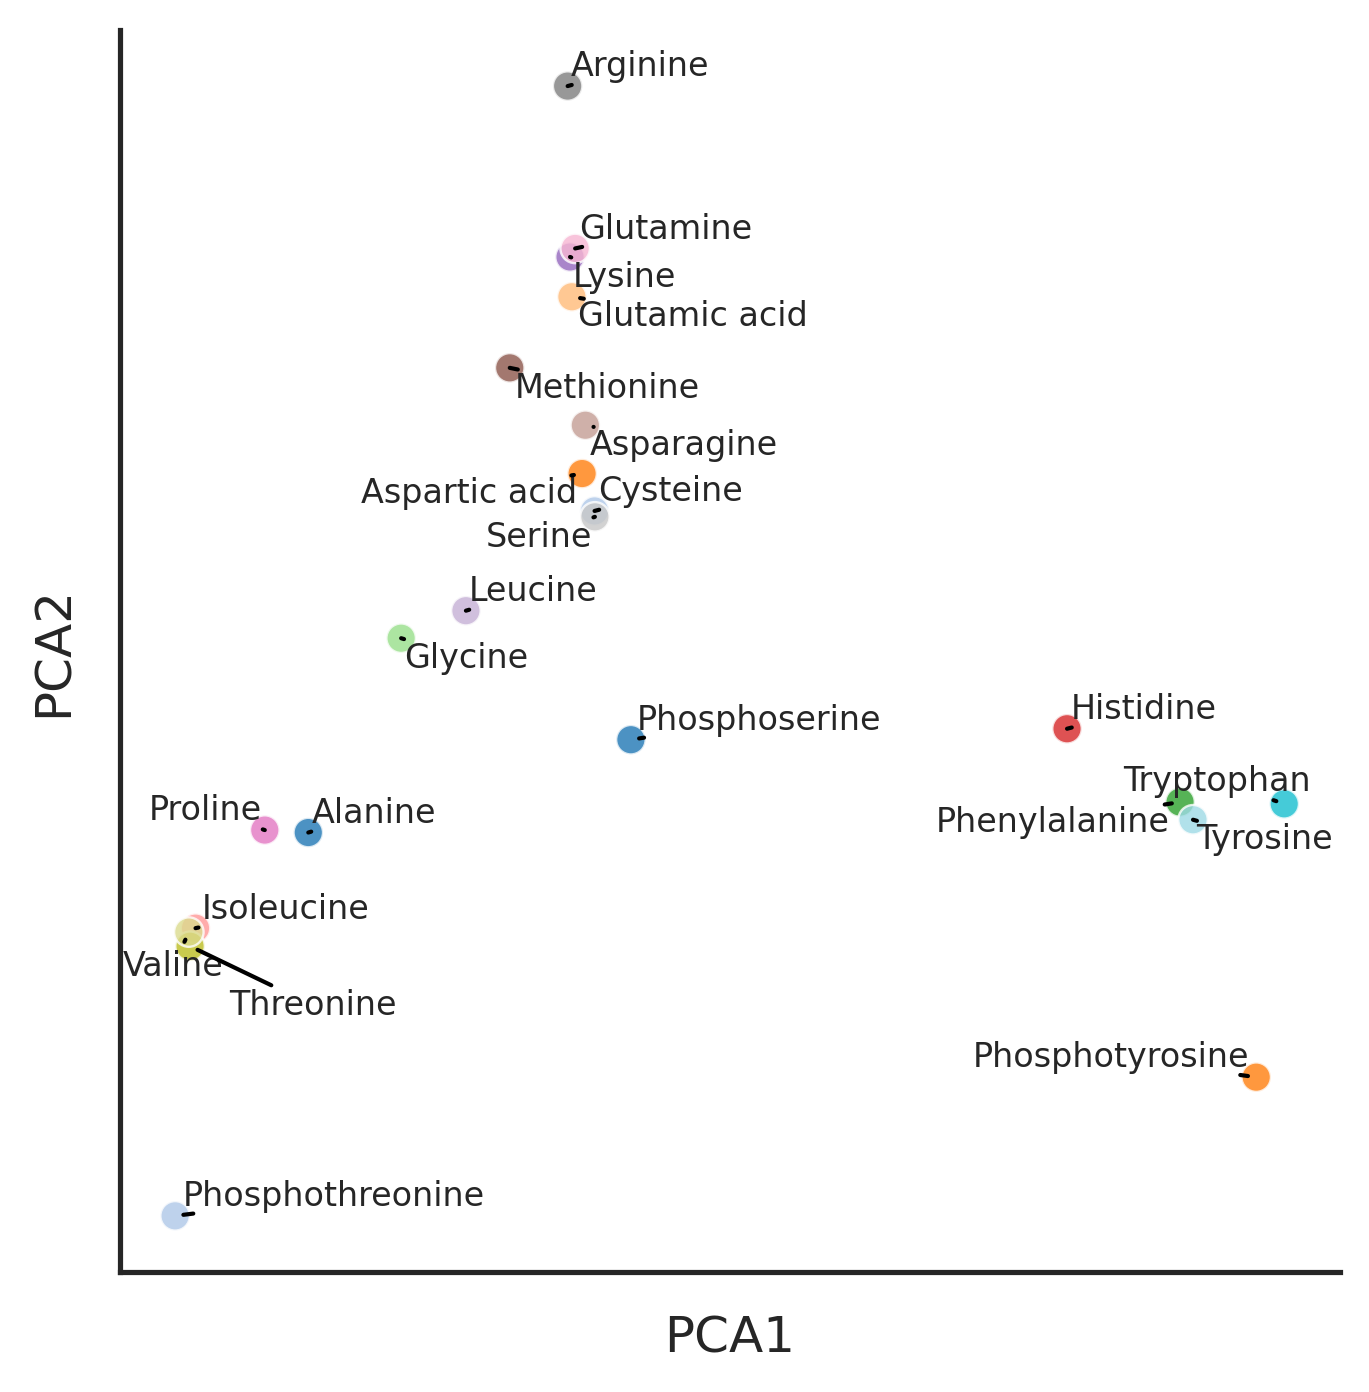

In [31]:
plot_cluster(aa_morgan, name_list = aa_info.Name, hue = 'aa', method = 'pca')

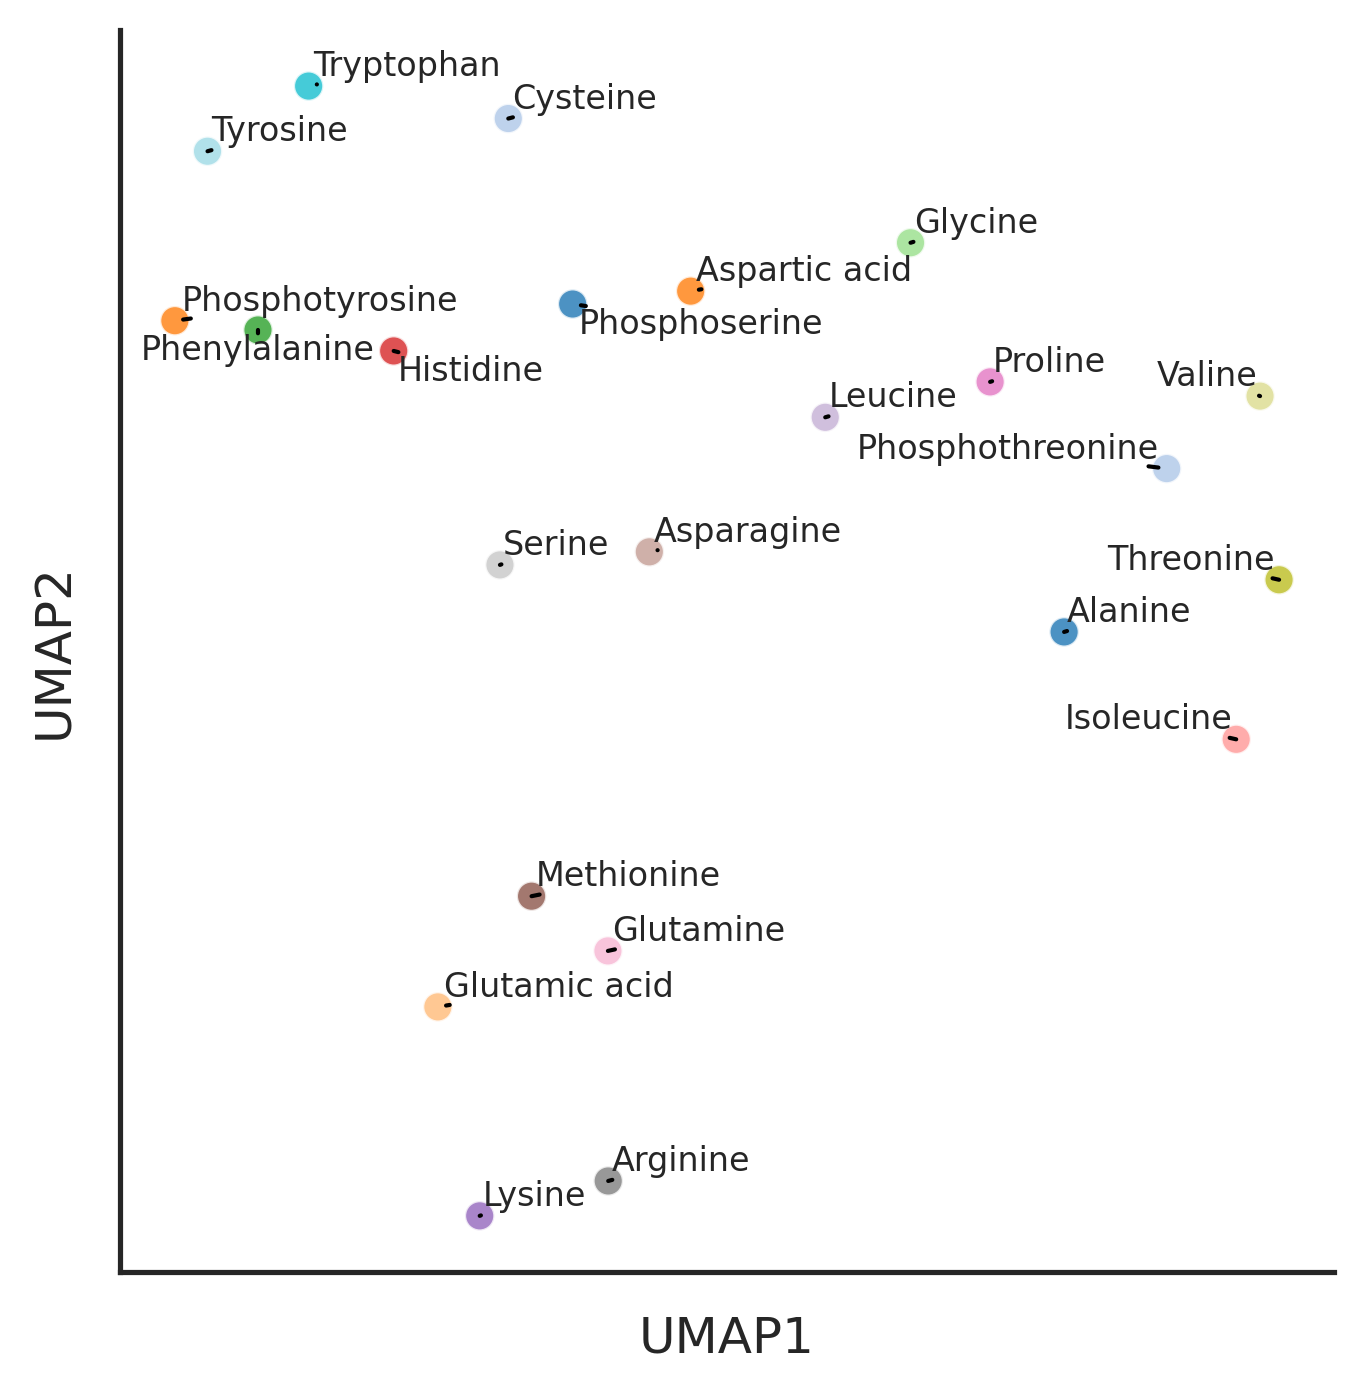

In [30]:
plot_cluster(aa_morgan, name_list = aa_info.Name, hue = 'aa', method = 'umap',complexity=5)